<a href="https://colab.research.google.com/github/ahmadrathore/Provisioning-SmartX-MicroBox/blob/master/5_LSTM_Multivariate_Horizon_Style.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [512]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
tf.random.set_seed(123)
np.random.seed(123)

In [513]:
#df = pd.read_csv(r'merge-csv.com__602f0aa73c265.csv')
#df = pd.read_csv('merge-csv.com__602f0aa73c265.csv',index_col='Processing_time',
#                infer_datetime_format=True)

url='https://raw.githubusercontent.com/ahmadrathore/Provisioning-SmartX-MicroBox/master/kafka9092_Network-Flows_1.csv'
#url='https://raw.githubusercontent.com/ahmadrathore/Provisioning-SmartX-MicroBox/master/kafka9092_Network-Flows_reduced_col.csv'
#url='https://raw.githubusercontent.com/ahmadrathore/Provisioning-SmartX-MicroBox/master/Network-Flows.csv'

df = pd.read_csv(url,index_col='Processing_time',
               # infer_datetime_format=True)
                parse_dates=True)

In [514]:
#Measurement_boxname_le = preprocessing.LabelEncoder()
#df['Measurement_boxname_le'] = Measurement_boxname_le.fit_transform(df['Measurement_boxname']) 

[06:16:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


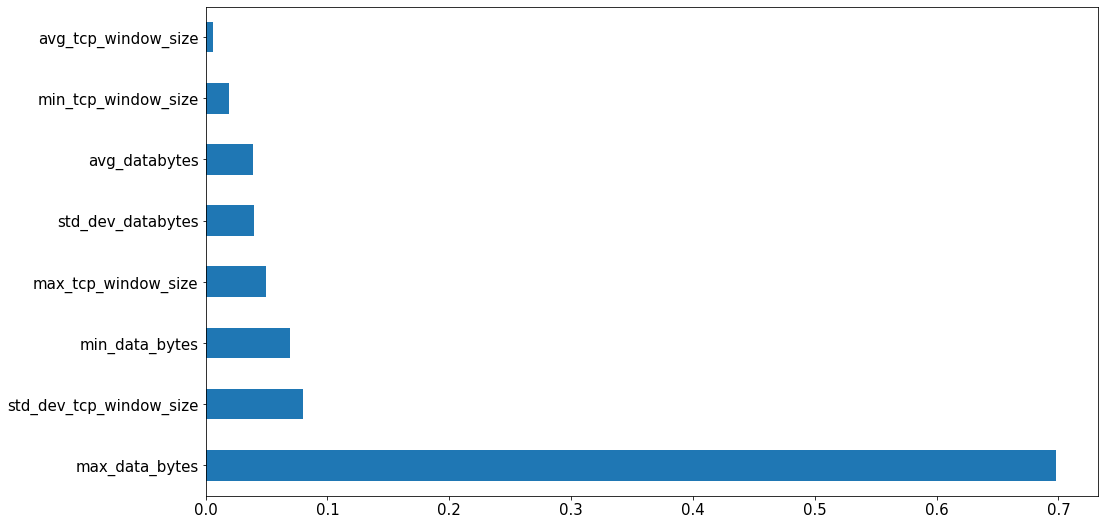

In [515]:
from numpy import loadtxt
from xgboost import XGBRegressor
from matplotlib import pyplot

model = XGBRegressor()
#model.fit(df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes']],df[['total_data_bytes']])
model.fit(df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes']],df[['total_data_bytes']])
#model.fit(df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'total_data_bytes','std_dev_databytes', 'Measurement_boxname_le']],df[['avg_databytes']])

#(pd.Series(model.feature_importances_, index=df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes']].columns)
(pd.Series(model.feature_importances_, index=df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes']].columns)
#(pd.Series(model.feature_importances_, index=df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'total_data_bytes','std_dev_databytes', 'Measurement_boxname_le']].columns)
   .nlargest(100)
   .plot(kind='barh'))

In [516]:
df = df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']]
#df = df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']]

In [517]:
def custom_ts_multi_data_prep(dataset, target, start, end, window, horizon):
    X = []
    y = []
    start = start + window
    if end is None:
        end = len(dataset) - horizon

    for i in range(start, end):
        indices = range(i-window, i)
        X.append(dataset[indices])

        indicey = range(i+1, i+1+horizon)
        y.append(target[indicey])
    return np.array(X), np.array(y)

In [518]:
validate = df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']].tail(100)
#validate = df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']].tail(100)
df.drop(df.tail(100).index,inplace=True)

In [519]:
#validate

In [520]:
x_scaler = preprocessing.MinMaxScaler()
y_scaler = preprocessing.MinMaxScaler()
#dataX = x_scaler.fit_transform(df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes', 'Measurement_boxname_le']])
#dataY = y_scaler.fit_transform(df[['avg_databytes']])
dataX = x_scaler.fit_transform(df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']])
#dataX = x_scaler.fit_transform(df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']])
dataY = y_scaler.fit_transform(df[['total_data_bytes']])



In [521]:
#hist_window = 48
#horizon = 10
#hist_window = 64
hist_window = 100
horizon = 100
TRAIN_SPLIT = 5574
x_train_multi, y_train_multi = custom_ts_multi_data_prep(
    dataX, dataY, 0, TRAIN_SPLIT, hist_window, horizon)
x_val_multi, y_val_multi= custom_ts_multi_data_prep(
    dataX, dataY, TRAIN_SPLIT, None, hist_window, horizon)

In [522]:
print ('Single window of past history')

print(x_train_multi[0])
print ('\n Target horizon')
#print (y_train_multi[0])

Single window of past history
[[1.         0.99948454 1.         0.00318907 0.49756098 0.67292164
  0.92620063 0.83064738 0.53022238]
 [1.         0.99948454 1.         0.00501139 0.0195122  0.66928238
  0.5560866  0.51308245 0.95353474]
 [1.         0.99948454 1.         0.00592255 0.2097561  0.80893893
  0.54369195 0.65795782 0.94257725]
 [1.         0.99948454 1.         0.00410023 0.0097561  0.63448197
  0.39828789 0.40143578 0.98858756]
 [1.         0.99948454 1.         0.00410023 0.13658537 0.63379961
  0.39270203 0.39483223 0.97741397]
 [1.         0.99948454 1.         0.00546697 0.20487805 0.66666667
  0.49240787 0.48279433 0.96592077]
 [1.         0.99948454 1.         0.00455581 0.01463415 0.64426248
  0.55013056 0.65527932 0.94442549]
 [1.         0.99948454 1.         0.00318907 0.04390244 0.70214944
  0.51846637 0.54657325 0.95507134]
 [1.         0.99896907 1.         0.00728929 0.10731707 0.59683839
  0.655647   0.66667732 0.94831418]
 [1.         0.99948454 1.        

In [523]:
y_train_multi[0]

array([[0.95675579],
       [0.95342669],
       [0.96434892],
       [0.93700524],
       [0.95319011],
       [0.97162017],
       [0.96217198],
       [0.95016128],
       [0.9435008 ],
       [0.5483135 ],
       [0.95733813],
       [0.96416353],
       [0.94840972],
       [0.95597214],
       [0.94372373],
       [0.94332451],
       [0.94130339],
       [0.93501483],
       [0.95018971],
       [0.9423566 ],
       [0.96352546],
       [0.54706807],
       [0.95907149],
       [0.94840176],
       [0.94293666],
       [0.96204914],
       [0.96224591],
       [0.9554262 ],
       [0.94530809],
       [0.94497712],
       [0.9765598 ],
       [0.97429869],
       [0.54664269],
       [0.95076864],
       [0.96023048],
       [0.94912172],
       [0.96505068],
       [0.93573138],
       [0.97024394],
       [0.9760912 ],
       [0.9517809 ],
       [0.9466229 ],
       [0.96037834],
       [0.96045682],
       [0.55213053],
       [0.96298521],
       [0.96207189],
       [0.945

In [524]:
BATCH_SIZE = 256
BUFFER_SIZE = 150
#BATCH_SIZE = 100
#BUFFER_SIZE = 50
#BATCH_SIZE = 150
#BUFFER_SIZE = 100

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [525]:
val_data_multi

<RepeatDataset shapes: ((None, 100, 9), (None, 100, 1)), types: (tf.float64, tf.float64)>

In [526]:
lstm_multi = tf.keras.models.Sequential()
lstm_multi.add(tf.keras.layers.LSTM(150,input_shape=x_train_multi.shape[-2:],
                                    return_sequences=True))
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.LSTM(units=100,return_sequences=False)),
lstm_multi.add(tf.keras.layers.Dropout(0.2)),
lstm_multi.add(tf.keras.layers.Dense(units=horizon)),
lstm_multi.compile(optimizer='adam', loss='mse')

In [527]:
model_path = r'\Chapter 7\LSTM_Multivariate.h5'

In [528]:
EVALUATION_INTERVAL = 100
EPOCHS = 150
history = lstm_multi.fit(train_data_multi, epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_data_multi, validation_steps=50,verbose =1,
                              callbacks =[tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min'),tf.keras.callbacks.ModelCheckpoint(model_path,monitor='val_loss', save_best_only=True, mode='min', verbose=0)])

Epoch 1/150
100/100 [==============================] - 6s 34ms/step - loss: 0.1176 - val_loss: 0.0362
Epoch 2/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0477 - val_loss: 0.0171
Epoch 3/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0377 - val_loss: 0.0389
Epoch 4/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0341 - val_loss: 0.0299
Epoch 5/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0303 - val_loss: 0.0175
Epoch 6/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0253 - val_loss: 0.0139
Epoch 7/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0219 - val_loss: 0.0103
Epoch 8/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0194 - val_loss: 0.0098
Epoch 9/150
100/100 [==============================] - 3s 28ms/step - loss: 0.0189 - val_loss: 0.0098
Epoch 10/150
100/100 [==============================] - 3s 29ms/step - loss: 0.018

In [529]:
Trained_model = tf.keras.models.load_model(model_path)

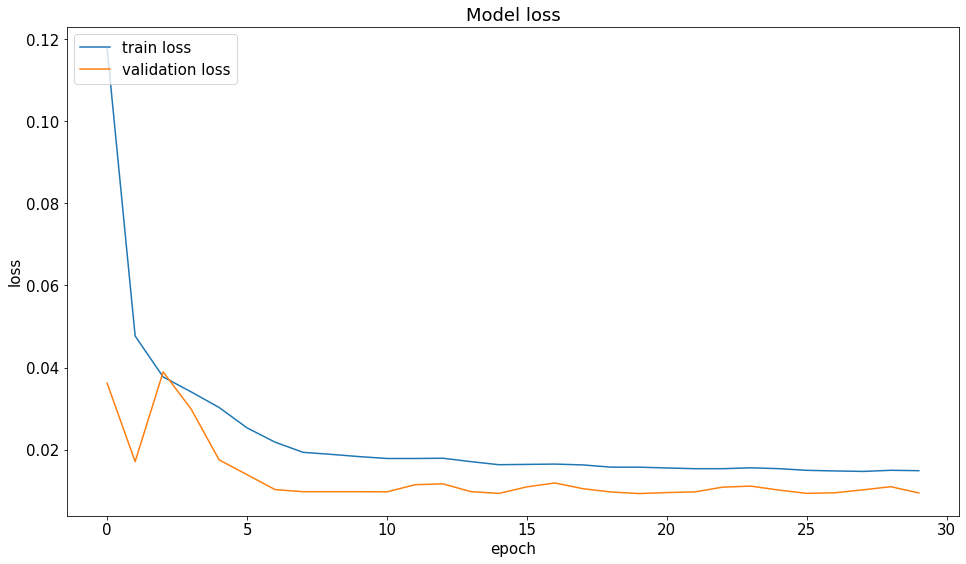

In [530]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper left')
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

In [531]:
# Show the model architecture
Trained_model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_32 (LSTM)               (None, 100, 150)          96000     
_________________________________________________________________
dropout_32 (Dropout)         (None, 100, 150)          0         
_________________________________________________________________
lstm_33 (LSTM)               (None, 100)               100400    
_________________________________________________________________
dropout_33 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
Total params: 206,500
Trainable params: 206,500
Non-trainable params: 0
_________________________________________________________________


In [532]:
data_val = x_scaler.fit_transform(df[['max_tcp_window_size','min_tcp_window_size','avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']].tail(80))
#data_val = x_scaler.fit_transform(df[['avg_tcp_window_size','std_dev_tcp_window_size','min_data_bytes', 'max_data_bytes', 'avg_databytes','std_dev_databytes','total_data_bytes']].tail(80))

In [533]:
val_rescaled = data_val.reshape(1, data_val.shape[0], data_val.shape[1])

In [534]:
Predicted_results = Trained_model.predict(val_rescaled)

In [535]:
Predicted_results

array([[0.7788072 , 0.78984255, 0.78129923, 0.78827506, 0.78951013,
        0.78851867, 0.7787519 , 0.7903004 , 0.78011376, 0.7924037 ,
        0.7838054 , 0.7837125 , 0.7864337 , 0.7778104 , 0.7837045 ,
        0.77886534, 0.78079385, 0.78471416, 0.7763159 , 0.7807054 ,
        0.7807768 , 0.77382785, 0.7826724 , 0.7862522 , 0.7894361 ,
        0.7789092 , 0.77486044, 0.7801458 , 0.7833255 , 0.7772439 ,
        0.776875  , 0.7791132 , 0.78558594, 0.7804812 , 0.7804936 ,
        0.78396   , 0.7800215 , 0.77808666, 0.78049654, 0.77754825,
        0.78142446, 0.778419  , 0.7819482 , 0.7842264 , 0.7878899 ,
        0.787392  , 0.7774317 , 0.78209144, 0.7840594 , 0.7888475 ,
        0.77946734, 0.78163886, 0.78730744, 0.78075767, 0.7856168 ,
        0.787098  , 0.7757565 , 0.78206897, 0.7853676 , 0.77641   ,
        0.78704906, 0.78206867, 0.7674536 , 0.7787609 , 0.78202236,
        0.7817427 , 0.7853318 , 0.79417247, 0.78064096, 0.7782794 ,
        0.77979404, 0.78077525, 0.7665974 , 0.79

In [536]:
Predicted_results_Inv_trans = y_scaler.inverse_transform(Predicted_results)

In [537]:
Predicted_results_Inv_trans

array([[728811.8 , 738514.2 , 731002.8 , 737136.06, 738221.94, 737350.25,
        728763.1 , 738916.8 , 729960.5 , 740766.  , 733206.25, 733124.56,
        735517.1 , 727935.4 , 733117.56, 728862.9 , 730558.44, 734005.25,
        726621.4 , 730480.7 , 730543.44, 724433.8 , 732210.1 , 735357.5 ,
        738156.9 , 728901.44, 725341.7 , 729988.7 , 732784.3 , 727437.3 ,
        727112.94, 729080.8 , 734771.75, 730283.56, 730294.5 , 733342.2 ,
        729879.4 , 728178.25, 730297.06, 727704.9 , 731112.9 , 728470.5 ,
        731573.4 , 733576.44, 736797.44, 736359.7 , 727602.44, 731699.3 ,
        733429.56, 737639.4 , 729392.2 , 731301.44, 736285.3 , 730526.6 ,
        734798.9 , 736101.2 , 726129.5 , 731679.56, 734579.8 , 726704.1 ,
        736058.1 , 731679.3 , 718829.5 , 728771.06, 731638.56, 731392.7 ,
        734548.3 , 742321.1 , 730424.06, 728347.75, 729679.44, 730542.1 ,
        718076.7 , 741237.4 , 726475.2 , 730908.56, 725682.44, 733134.25,
        728732.6 , 733648.9 , 731020.0

In [538]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [539]:
timeseries_evaluation_metrics_func(validate['total_data_bytes'],Predicted_results_Inv_trans[0])

Evaluation metric results:-
MSE is : 7786807110.336797
MAE is : 48599.93875
RMSE is : 88242.88702403608
MAPE is : 8.690230079216839
R2 is : -0.002593156262319374



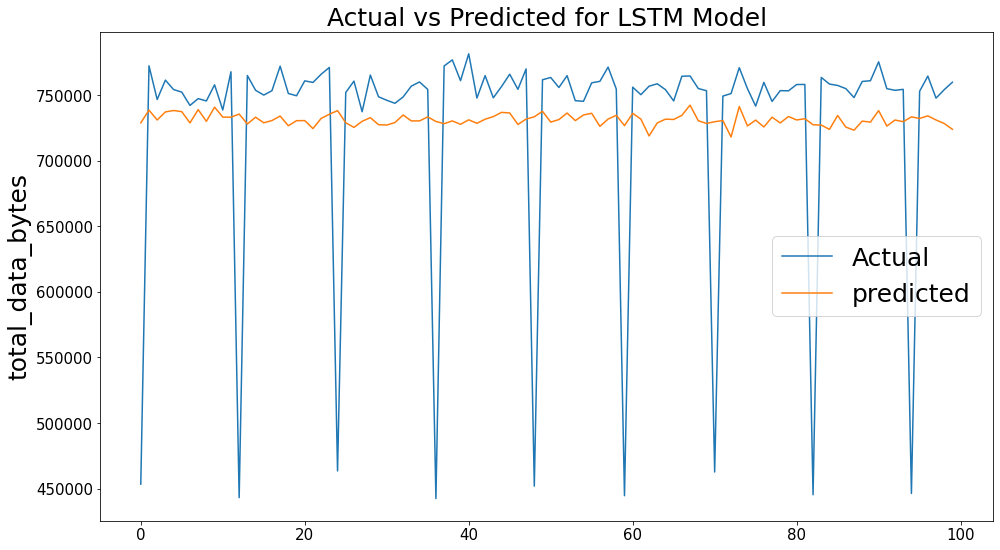

In [540]:



plt.plot( list(validate['total_data_bytes']))
plt.plot( list(Predicted_results_Inv_trans[0]))
plt.rcParams.update({'font.size': 15})
plt.title("Actual vs Predicted for LSTM Model", fontsize=25)
plt.ylabel("total_data_bytes", fontsize=25)
plt.legend(('Actual','predicted'), fontsize=25)
#plt.legend(loc=5, prop={'size': 10})
###plt.rc('legend', fontsize='medium')
plt.show()

